## Hugging Face Pipelines

In [ ]:
!pip install -q transformers datasets diffusers

In [ ]:
import torch
from transformers import pipeline, AutoModelForCausalLM, TextStreamer, BitsAndBytesConfig
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio
import torch
import gc

In [ ]:
classifier = pipeline("sentiment-analysis")
result = classifier("Pakistan won the tri series tournament")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9995236396789551}]


In [ ]:
# Named Entity Recognization

ner = pipeline("ner", grouped_entities=True)
result = ner("Barak Obama was 44th president of USA")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.9992514), 'word': 'Barak Obama', 'start': 0, 'end': 11}, {'entity_group': 'LOC', 'score': np.float32(0.999106), 'word': 'USA', 'start': 34, 'end': 37}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
# Question Answering with Context

question_answer = pipeline("question-answering")
result = question_answer(question="Who was 44th president of USA?", context="Barak Obama was 44th president of USA")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 0 files: 0it [00:00, ?it/s]

Device set to use cuda:0


{'score': 0.9907739458722062, 'start': 0, 'end': 11, 'answer': 'Barak Obama'}


In [ ]:
# Summarization

summarizer = pipeline("summarization")
text = """ In C++, an association is a relationship between two classes where one class “has a” relationship with the other class.
           In other words, an instance of one class has an instance of the other class as a member.
          This is a way of modeling real-world relationships between objects in an object-oriented programming language. """
summary = summarizer(text, max_length=25)
print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Your min_length=56 must be inferior than your max_length=25.
/usr/local/lib/python3.12/dist-packages/transformers/generation/utils.py:1618: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (25). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


[{'summary_text': ' In C++, an association is a relationship between two classes where one class “has a” relationship'}]


In [ ]:
#classificaton

classification = pipeline("zero-shot-classification")
result = classification(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': 'This is a course about the Transformers library', 'labels': ['education', 'business', 'politics'], 'scores': [0.844595193862915, 0.11197695881128311, 0.04342786595225334]}


In [ ]:
# text generation

generator = pipeline("text-generation")
result = generator("In this course, we will teach you how to")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In this course, we will teach you how to construct and use data structures and data structures with Haskell. In Haskell you can use data structures in the form of functions that do something rather than just do some arithmetic.

Data Structures

We will be using data structures in this course to create a series of data structures:

data Int where Int = Int -> Int -> Int :: Int -> Int -> Int data Int where Int = Int -> Int -> Int -> Int

We will also use an example in which we will use a function to build a list of numbers.

data Int where Int = Int -> Int -> Int :: Int -> Int type Int where Int = Int -> Int :: Int -> Int type Int where Int = Int -> Int :: Int

We will also see what functions are used to build lists of numbers.

data Number where Int = 0 -> Number :: Number -> Number type Int where Int = 0 -> Number :: Number -> Number type Int where Int = 0 -> Number :: Number -> Number

data Int where Int = 1 -> Int :: Int :: Int -> Int data Int where Int = 1 -> Int :: Int :: Int -> I

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

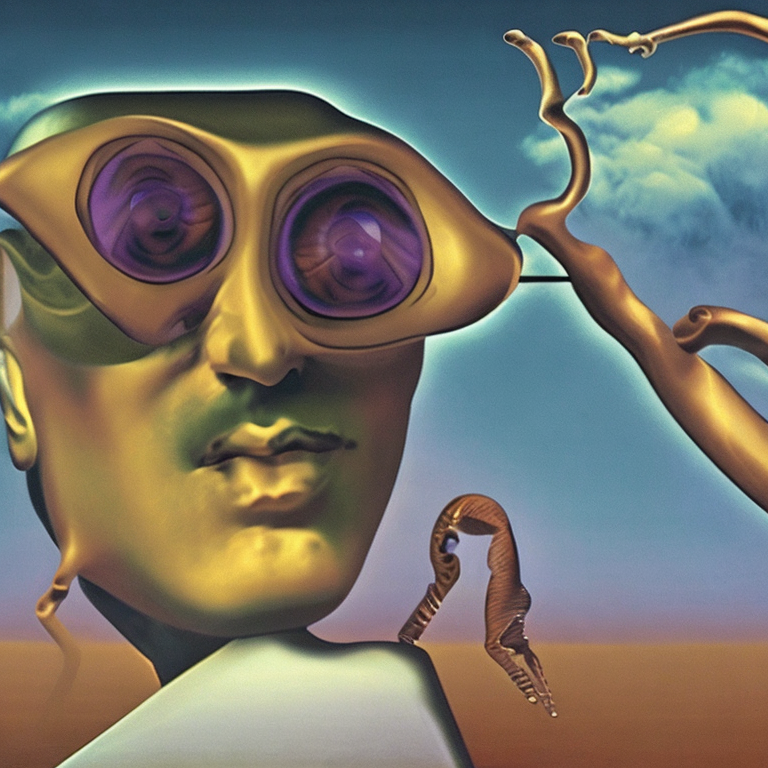

In [ ]:
# image generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

text = "A class of data scientist learning AI, int the surreal style of salvador Dali"
image = image_gen(text).images[0]
image

## Hugging Face Tokenization

In [ ]:
from google.colab import userdata
from huggingface_hub import login
from transformers import AutoTokenizer

In [ ]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token)

### Accessing Models for tokenization

In [ ]:
PHI3_MODEL_NAME = 'microsoft/Phi-3-mini-4k-instruct'
QWEN2_MODEL_NAME = 'Qwen/Qwen2-7B-Instruct'
STARCODER2_MODEL_NAME = 'bigcode/starcoder2-3b'

In [ ]:
phi3_tokenizer = AutoTokenizer.from_pretrained(PHI3_MODEL_NAME)

text = "I am excited to work with Tokenizers in action for my LLM Journey"

print(phi3_tokenizer.encode(text))

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

[306, 626, 24173, 304, 664, 411, 25159, 19427, 297, 3158, 363, 590, 365, 26369, 435, 473, 3801]


In [ ]:
messages = [
    {"role": "system", "content": "You are a helpful assistant" },
    {"role": "user", "content": "Tell me a joke on data science?"}
]

In [ ]:
print(phi3_tokenizer.encode(text))

[306, 626, 24173, 304, 664, 411, 25159, 19427, 297, 3158, 363, 590, 365, 26369, 435, 473, 3801]


In [ ]:
print(phi3_tokenizer.batch_decode(phi3_tokenizer.encode(text)))

['I', 'am', 'excited', 'to', 'work', 'with', 'Token', 'izers', 'in', 'action', 'for', 'my', 'L', 'LM', 'J', 'our', 'ney']


In [ ]:
print(phi3_tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True))

<|system|>
You are a helpful assistant<|end|>
<|user|>
Tell me a joke on data science?<|end|>
<|assistant|>



In [ ]:
qwen2_tokenizer = AutoTokenizer.from_pretrained(QWEN2_MODEL_NAME)
print(qwen2_tokenizer.encode(text))

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

[40, 1079, 12035, 311, 975, 448, 9660, 12230, 304, 1917, 369, 847, 444, 10994, 42580]


In [ ]:
print(qwen2_tokenizer.batch_decode(qwen2_tokenizer.encode(text)))

['I', ' am', ' excited', ' to', ' work', ' with', ' Token', 'izers', ' in', ' action', ' for', ' my', ' L', 'LM', ' Journey']


In [ ]:
print(qwen2_tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True))

<|im_start|>system
You are a helpful assistant<|im_end|>
<|im_start|>user
Tell me a joke on data science?<|im_end|>
<|im_start|>assistant



## Working with models

In [ ]:
PHI3 = "microsoft/Phi-3-mini-4k-instruct"
GEMMA2 = "google/gemma-2-2b-it"
QWEN2 = "Qwen/Qwen2-7B-Instruct"

In [ ]:
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]

In [ ]:
# Quantization config - this will allow to load the model in memory and use less memory

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(PHI3)
tokenizer.pad_token = tokenizer.eos_token
inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to("cuda")

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForCausalLM.from_pretrained(PHI3, device_map="auto", quantization_config=quant_config)

In [ ]:
memory = model.get_memory_footprint() / 1e6
print(f"Memory footprint: {memory:,.1f} MB")

In [ ]:
# Wrapping everything in a function - and adding Streaming and generation prompts

def generate(model, messages):
  tokenizer = AutoTokenizer.from_pretrained(model)
  tokenizer.pad_token = tokenizer.eos_token
  inputs = tokenizer.apply_chat_template(messages, return_tensors="pt", add_generation_prompt=True).to("cuda")
  streamer = TextStreamer(tokenizer)
  model = AutoModelForCausalLM.from_pretrained(model, device_map="auto", quantization_config=quant_config)
  outputs = model.generate(inputs, max_new_tokens=80, streamer=streamer)
  del model, inputs, tokenizer, outputs, streamer
  gc.collect()
  torch.cuda.empty_cache()